In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [293]:
m = 1.
omega = 1.
#k_B = 1.38065156*10**(-23)
k_B = 1.
T = 20
beta = 1/(k_B*T)

In [294]:
beta

0.05

In [295]:
# Definizione della distribuzione di Gibbs (non normalizzata)
def gibbs_distribution(q, p):
    return np.exp(-beta*((p**2)/(2*m) + (m*omega**2)*(q**2)/2))

In [296]:
# Definizione della proposta di transizione (scelta semplice per dimostrazione)
def proposal(x, y):
    x_new = x + np.random.normal()
    y_new = y + np.random.normal()
    return x_new, y_new

In [297]:
# Parametri dell'algoritmo
num_samples = 1000000
burn_in = 5000

In [298]:
# Inizializzazione
current_q, current_p = 0.0, 0.0
samples = []

In [299]:
# Ciclo di campionamento
for _ in range(num_samples + burn_in):
    proposed_q, proposed_p = proposal(current_q, current_p)
    
    acceptance_ratio = min(1, gibbs_distribution(proposed_q, proposed_p) / gibbs_distribution(current_q, current_p))
    
    if np.random.uniform() < acceptance_ratio:
        current_q, current_p = proposed_q, proposed_p
    
    if _ >= burn_in:
        samples.append((current_q, current_p))

In [300]:
# Estrazione dei campioni di x e y
sampled_q = [sample[0] for sample in samples]
sampled_p = [sample[1] for sample in samples]

sampled_q = np.array(sampled_q) 
sampled_p = np.array(sampled_p) 

In [314]:
len(sampled_q)

1000000

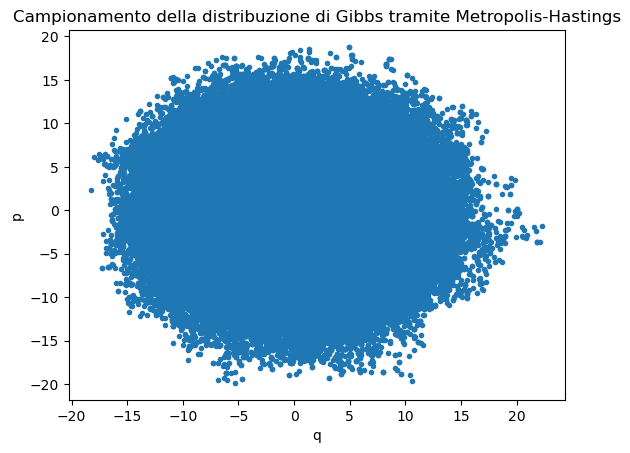

In [301]:
# Visualizzazione dei risultati
plt.scatter(sampled_q, sampled_p, marker='.')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Campionamento della distribuzione di Gibbs tramite Metropolis-Hastings')
plt.show()

In [311]:
np.mean(sampled_q*sampled_q)

20.410858880939212

In [313]:
np.mean(sampled_q)*np.mean(sampled_q)

8.3525281684289e-05

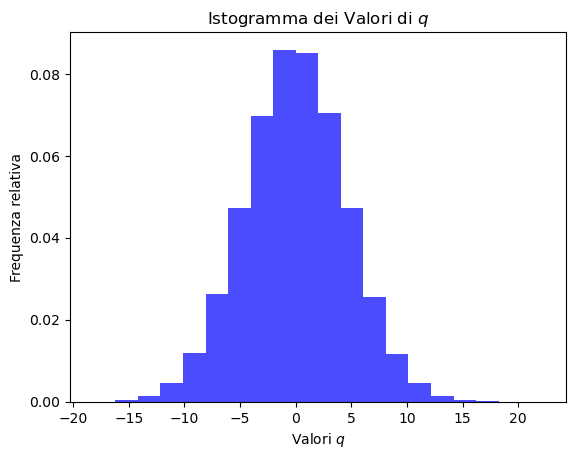

In [303]:
# Crea l'istogramma
plt.hist(sampled_q, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $q$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $q$')

# Mostra il plot
plt.show()

In [312]:
np.mean(sampled_p*sampled_p)

20.19597489120887

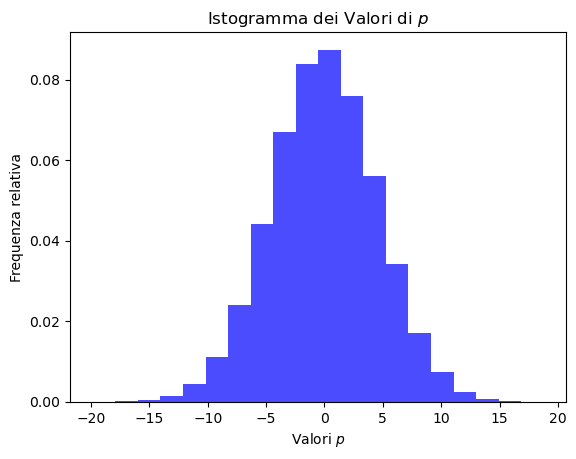

In [305]:
# Crea l'istogramma
plt.hist(sampled_p, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $p$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $p$')

# Mostra il plot
plt.show()

In [306]:
kinetic = (sampled_p*sampled_p)/(2*m)
potential = (m*omega*omega/2)*(sampled_q*sampled_q)
energy = kinetic + potential

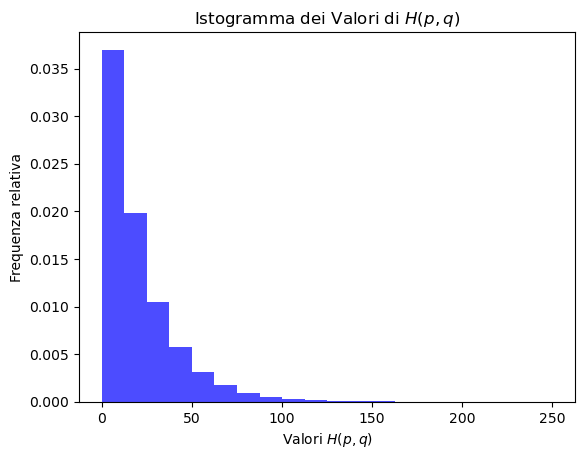

In [307]:
# Crea l'istogramma
plt.hist(energy, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $H(p,q)$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $H(p,q)$')

# Mostra il plot
plt.show()

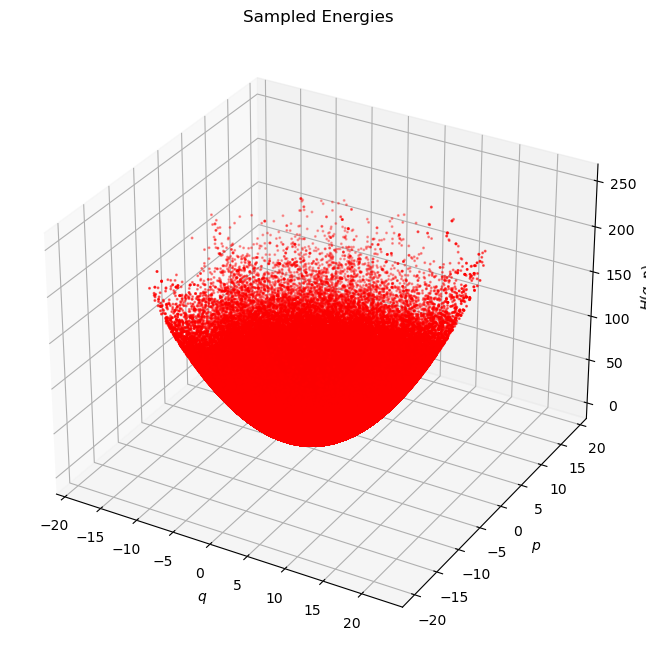

In [308]:
# Crea una figura e un'area 3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

# Crea lo scatter plot in 3D
ax.scatter(sampled_q, sampled_p, energy, c='r', marker='o', s=1.2)

# Etichette degli assi
ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('$H(q,p)$')

# Titolo del plot
ax.set_title('Sampled Energies')

# Mostra il plot
plt.show()